# [IMPROVING ADVERSARIAL ROBUSTNESS REQUIRES REVISITING MISCLASSIFIED EXAMPLES<br />提高对抗鲁棒性需要重访错误分类的样本](https://openreview.net/pdf?id=rklOg6EFwS)

Contribuation  
贡献
- We find that misclassified examples indeed have a significant impact on the final robustness. More surprisingly, we find that different minimization techniques on misclassified examples are crucial on the final robustness.  
我们发现误分类样本确实对最终鲁棒性有重大影响。更令人惊讶的是，我们发现不同的误分样本最小化技术对最终鲁棒性至关重要。
- We propose a regularized adversarial risk which incorporates an explicit differentiation of misclassified examples as a regularizer. Based on that, we further propose a new defense algorithm, called Misclassification Aware adveRsarial Training (MART).  
我们提出了一种正则化的对抗风险，它将误分类样本的显式区分作为正则化器。基于此，我们进一步提出了一种新的防御算法，称为 "误分类感知训练"（Misclassification Aware adveRsarial Training，MART）。
- MART also helps improve recently proposed adversarial training with unlabeled data.  
MART 还有助于改善最近提出的使用无标记数据进行对抗训练的方法。



## MISCLASSIFICATION AWARE ADVERSARIAL RISK<br />误分类感知对抗风险

$$
S^{+}_{h_{θ}} = {i : i \in [n], h_{θ}(x_{i}) = y_{i}}
$$

$$
S^{−}_{h_{θ}} = {i : i \in [n], h_{θ}(x_{i}) \not= y_{i}}
$$

$$
\widehat{x'}_{i} = \rm{argmax}_{x'_{i} \in B_{\epsilon} (x_{i} )} \mathbb{1}(h_{θ} (x'_{i})\not= y_{i}).
$$

$$
R^{−}(h_{θ}, x_{i}) := 1(h_{θ}(\widehat{x'}_{i}) \not= y_{i}) + 1(h_{θ}(x_{i}) \not= h_{θ}(\widehat{x'}_{i}))
$$

The first and second terms correspond to the standard adversarial risk and the regularization term respectively. The second terms aims to encourage the output of neural network to be stable against misclassified adversarial examples.   
第一项和第二项分别对应于标准对抗风险和正则化项。第二项旨在鼓励神经网络的输出对误分类的对抗样本保持稳定。

$$
R^{+}(h_{θ}, x_{i}) := \max_{x'_{i} \in B_{\epsilon} (x_{i} )} 1(h_{θ}(x'_{i}) \not= y_{i}) = 1(h_{θ}(\widehat{x'}_{i}) \not= y_{i})
$$

$$
\min_{\theta} R_{\rm{misc}}(h_{\theta}) := \frac{1}{n} (\sum_{i \in S_{h_{θ}}^{+}} R^{+}(h_{θ}, x_{i}) + \sum_{i \in S_{h_{θ}}^{−}} R^{−}(h_{θ}, x_{i})) = \frac{1}{n} \sum_{i=1}^{n} \{ 1(h_{θ}(\widehat{x'}_{i}) \not= y_{i}) + 1(h_{θ}(x_{i}) \not= h_{θ}(\widehat{x'}_{i})) · 1(h_{θ}(x'_{i}) \not= y_{i}) \}
$$

$\frac{1}{n} \sum_{i=1}^{n} 1(h_{θ}(x_{i}) \not= h_{θ}(\widehat{x'}_{i})) · 1(h_{θ}(x'_{i}) \not= y_{i})$ is called misclassification aware regularization.  
$\frac{1}{n} \sum_{i=1}^{n} 1(h_{θ}(x_{i}) \not= h_{θ}(\widehat{x'}_{i})) · 1(h_{θ}(x'_{i}) \not= y_{i})$ 被称为误分类感知正则化。

## Surrogate Loss for Outer Minimization<br />外部最小化的替代损失

For $1(h_{θ}(\widehat{x'}_{i}) \not= y_{i})$,  
对于 $1(h_{θ}(\widehat{x'}_{i}) \not= y_{i})$，

$$
BCE(p(\widehat{x'}_{i}, θ), y_{i} ) = − log (p_{y_{i}} (\widehat{x'}_{i}, θ)) − log (1 − \max_{k \not= y_{i}} p_{k} (\widehat{x'}_{i}, θ)),
$$

For $1(h_{θ}(x_{i}) \not= h_{θ}(\widehat{x'}_{i}))$, since $h_{θ}(x_{i}) \not= h_{θ}(\widehat{x'}_{i})$ implies that adversarial examples have different output distributions to that of natural examples. Thus  
对于 $1(h_{θ}(x_{i}) \not= h_{θ}(\widehat{x'}_{i}))$，由于 $h_{θ}(x_{i}) \not= h_{θ}(\widehat{x'}_{i})$ 意味着对抗样本的输出分布与自然样本的输出分布不同。因此
$$
KL(p(x_{i},\theta) \Vert p(\widehat{x'}_{i},\theta)) = \sum_{k=1}^{K} p_{k}(x_{i},\theta)log\frac{p_{k}(x_{i},\theta)}{p_{k}(\widehat{x'}_{i},\theta)}
$$
For $1(h_{θ}(x'_{i}) \not= y_{i})$,
$$
1-p_{y_{i}}(x_{i},\theta)
$$

## Surrogate Loss for Inner Maximization<br />内部最大化的替代损失

$$
\widehat{x'}_{i} = \rm{argmax}_{x'_{i} \in B_{\epsilon} (x_{i} )} CE(p(x'_{i}, θ), y_{i} )
$$

## The Overall Objective<br />总体目标

$$
L^{MART}(θ) = \frac{1}{n}  \sum_{i=1}^{n} l(x_{i}, y_{i}, θ)
$$

$$
l(x_{i}, y_{i}, θ) := BCE(p(\widehat{x'}_{i}, θ), y_{i} ) + λ · KL(p(x_{i},\theta) \Vert p(\widehat{x'}_{i},\theta)) · (1-p_{y_{i}}(x_{i},\theta))
$$

## SEMI-SUPERVISED EXTENSION WITH UNLABELED DATA<br />使用无标记数据的半监督扩展

Semi-supervised learning with additional unlabeled data can improve the adversarial robustness.  
使用额外的无标记数据进行半监督学习可以提高对抗鲁棒性。

$$
L_{semi}^{MART}(θ) = \sum_{i \in S_{sup}} L_{sup}^{MART}(x_{i},y_{i};θ) + γ · \sum_{i \in S_{unsup}} L_{unsup}^{MART}(x_{i},y_{i};θ)
$$

$$
L_{sup}^{MART}(x,y;θ) = L_{unsup}^{MART}(x,y;θ)
$$


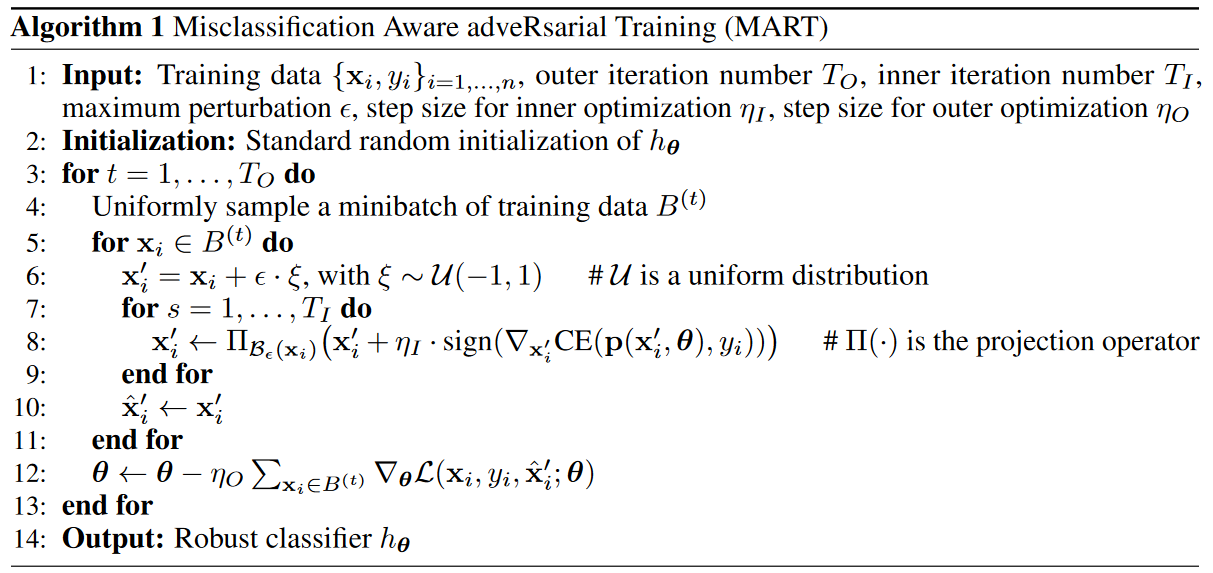